# Pycapacity interactive demo with randomised models of humans and robots notebook

Software dependencies: 
- `pycapacity` - task-space physical ability calculation package
```
pip install pycapacity
```
- `jupyter` to run this notebook
```
pip install jupyter
```
Optional
- `ipympl` and `ipywidgets` for interactive visualisation of plots

```
pip install ipywidgets
pip install ipympl
```

In [1]:
import numpy as np

import pycapacity.robot as capacity # robot capacity module
from pycapacity.visual import plot_polytope_faces, plot_polytope_vertex, plot_ellipsoid, plot_polytope  # visualistion tools
import matplotlib.pyplot as plt
import matplotlib

# seed to have the same images 
np.random.seed(1234)

## Generic 3D robot example
`m=3`
Define jacobian matrix and torque limits

In [2]:
m = 3 # 3d forces
n = 6 # robot dof 
J = np.array(np.random.rand(m,n))
# torque limits
t_min = -10*np.ones(n)
t_max = 10*np.ones(n)
# velocity limits
dq_min = -5*np.ones(n)
dq_max = 5*np.ones(n)

Calculate the force polytope vertices <br>
$ \mathcal{P}_f = \{f ~|~  J^Tf= \tau, \quad \tau  \in [\tau_{min},~ \tau_{max}]\}$

In [3]:
f_poly = capacity.force_polytope(J,t_max,t_min)

Calculate the velocity polytope vertices <br>$ \mathcal{P}_v = \{\dot{x} ~|~  \dot{x} = J\dot{q}, \quad \dot{q}  \in [\dot{q}_{min},~ \dot{q}_{max}]\}$

In [4]:
vel_poly = capacity.velocity_polytope(J,dq_max,dq_min)

Visualise the vertices force and velocity polytopes: `f_vert` and `vel_vert`

Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis


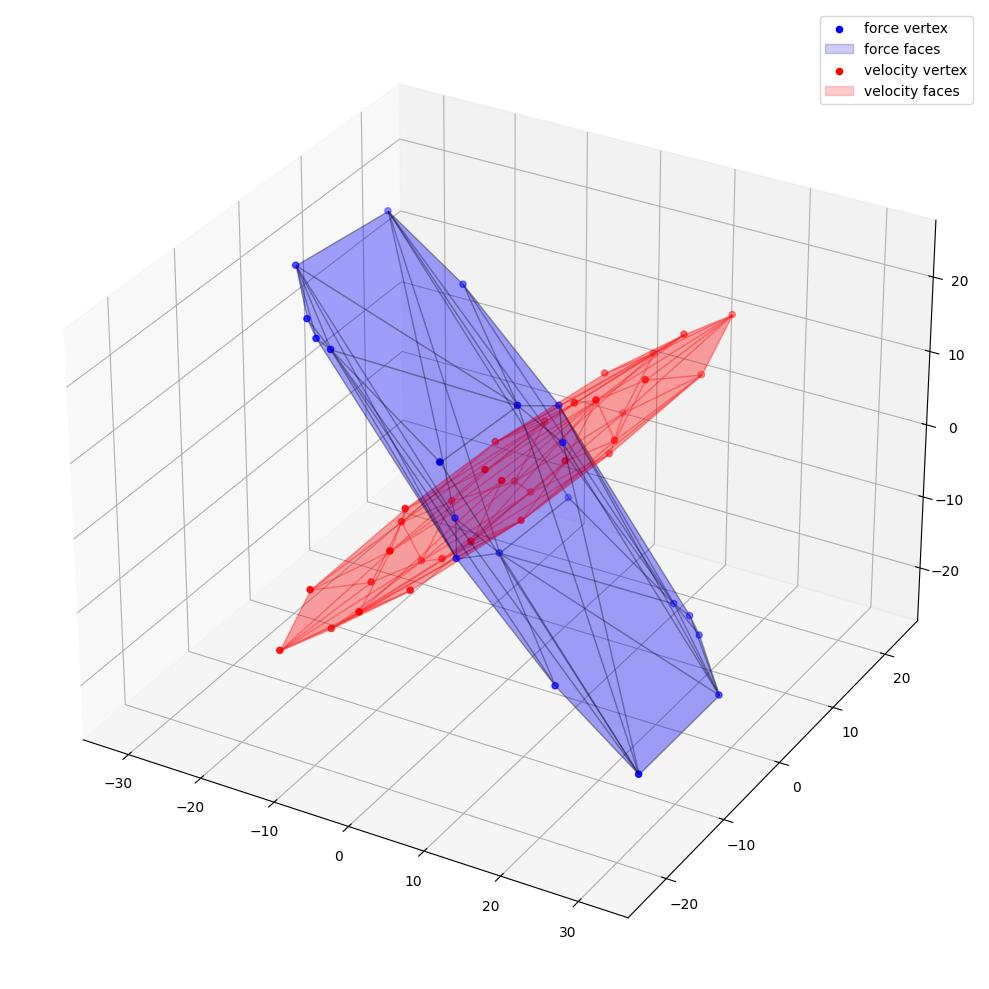

In [5]:
# uncomment for interactive plots
# %matplotlib widget
fig = plt.figure(1, figsize=[10,10])


# plot polytope
plot_polytope(plot=fig,
               polytope=f_poly, 
               face_color='blue', 
               edge_color='black',
               vertex_color='blue',
               label='force',
               alpha=0.2)
    
# plot polytope
plot_polytope(plot=fig,
               polytope=vel_poly, 
               face_color='red', 
               edge_color='red',
               vertex_color='red',
               label='velocity',
               alpha=0.2)

plt.tight_layout()
plt.legend()

# Force polytope vs force ellipsoid

Calculate the force ellipsoid  <br>
$\mathcal{E}_f = \{f ~|~  J^Tf= W\tau, \quad ||\tau|| \leq 1\}, \qquad W = diag(\tau_{1,max}-\tau_{1,min},~\ldots~,~ \tau_{n,max}-\tau_{n,min})^{-1}$


In [6]:
f_ellipsoid = capacity.force_ellipsoid(J, t_max)

using provided 3d axis


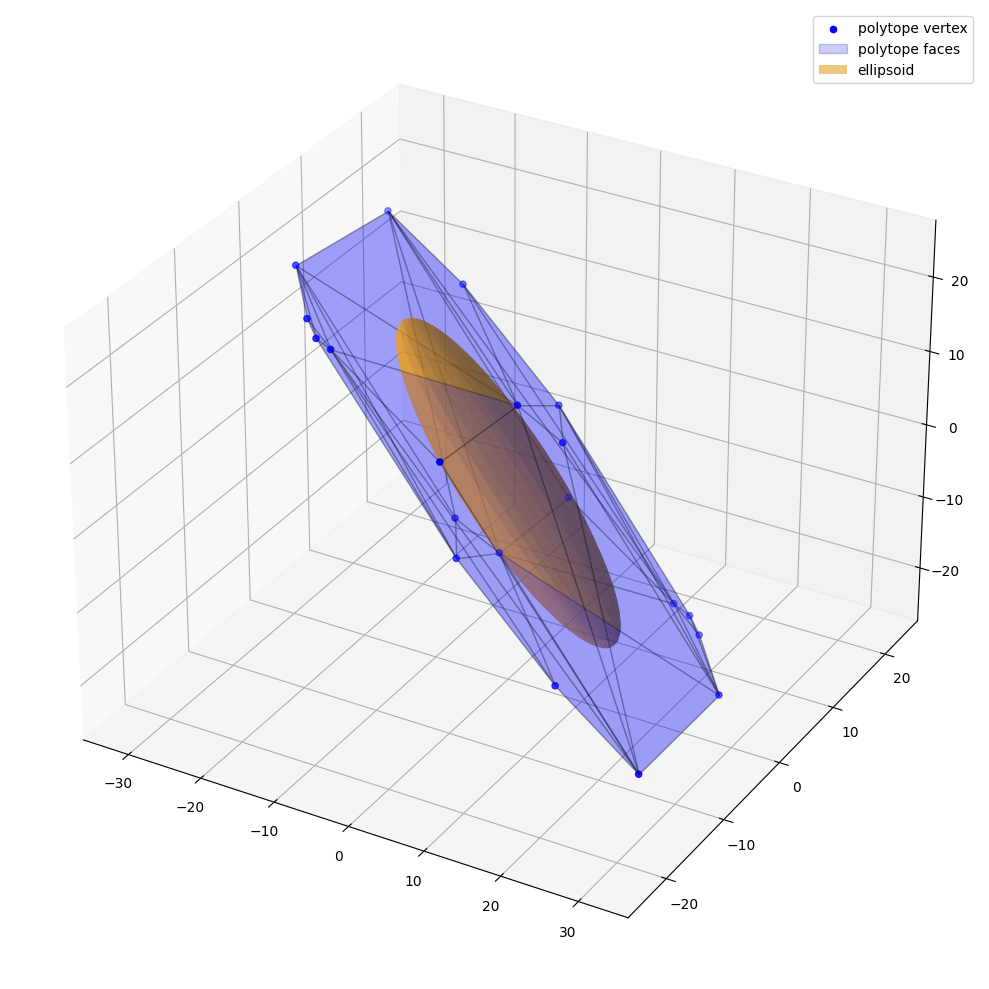

In [7]:
# uncomment for interactive plots
# %matplotlib widget
fig = plt.figure(2, figsize=[10,10])

# plot polytope
plot_polytope(plot=fig,
               polytope=f_poly, 
               face_color='blue', 
               edge_color='black',
               vertex_color='blue',
               label='polytope',
               alpha=0.2)
    
# plot ellipsoid
plot_ellipsoid(ellipsoid=f_ellipsoid, 
               plot=fig,
               label='ellipsoid', 
               color='orange',
               alpha=0.5)

plt.tight_layout()
plt.legend()
plt.show()

# Intersection example
`m=3`
Define jacobian matrix and torque limits

In [8]:
m = 3 # 3d forces
n = 6 # robot dof 
J1 = np.array(np.random.rand(m,n))
J2 = np.array(np.random.rand(m,n))
t_min = np.ones(n)
t_max = -np.ones(n)

Calculate the force polytope vertices <br>
$\mathcal{P}_f = \{f ~|~  J^Tf= \tau, \quad \tau  \in [\tau_{min},~ \tau_{max}]\}$

In [9]:
f1_poly = capacity.force_polytope(J1, t_max, t_min)
f2_poly = capacity.force_polytope(J2, t_max, t_min)

Calculate the Intersection  <br>  $ \mathcal{P}_{\cap} = \mathcal{P}_{f1} \cap  \mathcal{P}_{f2}$

In [10]:
f_int_poly = capacity.force_polytope_intersection(J1,J2,t_max,t_min,t_max,t_min)

Visualise the vertices `f_vert`

Visual: no faces found, calculating faces
creating a new 3d axis
Visual: no faces found, calculating faces
using existing 3d axis
Visual: no faces found, calculating faces
using provided 3d axis


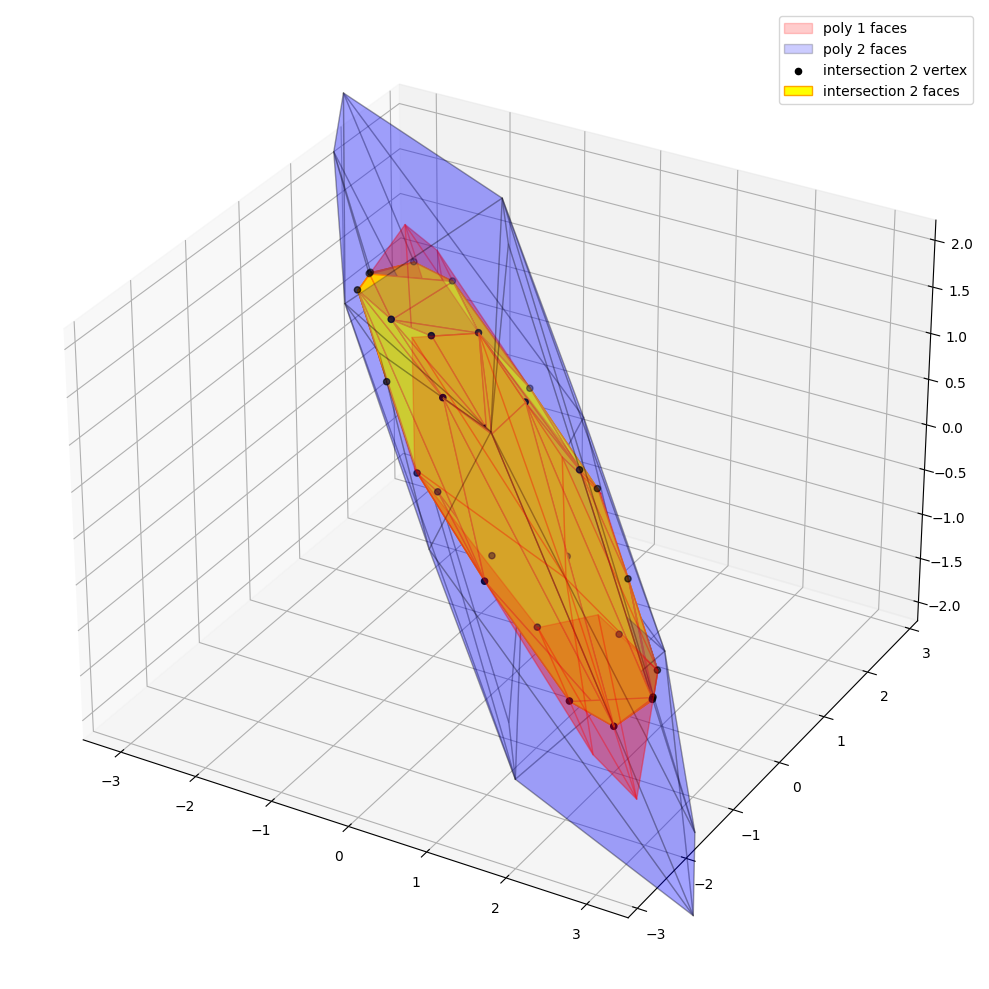

In [11]:
# uncomment for interactive plots
# %matplotlib widget
fig = plt.figure(3,figsize=[10,10])

# polytope1
plot_polytope(plot=fig,
               polytope=f1_poly, 
               face_color='red', 
               edge_color='red',
               label='poly 1',
               show_vertices=False,
               alpha=0.2)

# polytope2
plot_polytope(plot=fig,
               polytope=f2_poly, 
               face_color='blue', 
               edge_color='black',
               label='poly 2',
               show_vertices=False,
               alpha=0.2)

# intersection polytope
plot_polytope(plot=fig,
               polytope=f_int_poly, 
               face_color='yellow', 
               edge_color='orange',
               vertex_color='black',
               label='intersection 2',
               alpha=1)

fig.tight_layout()
plt.legend()
plt.show()

# Minkowski sum example
`m=3`
Define jacobian matrix and torque limits

In [12]:
m = 2 # 3d forces
n = 4 # robot dof 
J1 = np.array(np.random.rand(m,n))
J2 = np.array(np.random.rand(m,n))
t_min = np.ones(n)
t_max = -np.ones(n)

Calculate the force polytope vertices <br>
$ \mathcal{P}_f = \{f ~|~  J^Tf= \tau, \quad \tau  \in [\tau_{min},~ \tau_{max}]\}$

In [13]:
f1_poly = capacity.force_polytope(J1, t_max, t_min)
f2_poly = capacity.force_polytope(J2, t_max, t_min)

Calculate the Minkowski sum  <br>  $ \mathcal{P}_{\oplus} = \mathcal{P}_{f1} \oplus  \mathcal{P}_{f2}$

and the Intersection  <br>  $ \mathcal{P}_{\cap} = \mathcal{P}_{f1} \cap  \mathcal{P}_{f2}$

In [14]:
f_int_poly = capacity.force_polytope_intersection(J1,J2,t_max,t_min,t_max,t_min)
f_sum_poly = capacity.force_polytope_sum(J1,J2,t_max,t_min,t_max,t_min)

Visualise the vertices `f_vert`

Visual: no faces found, calculating faces
Visual: no faces found, calculating faces
Visual: no faces found, calculating faces
Visual: no faces found, calculating faces


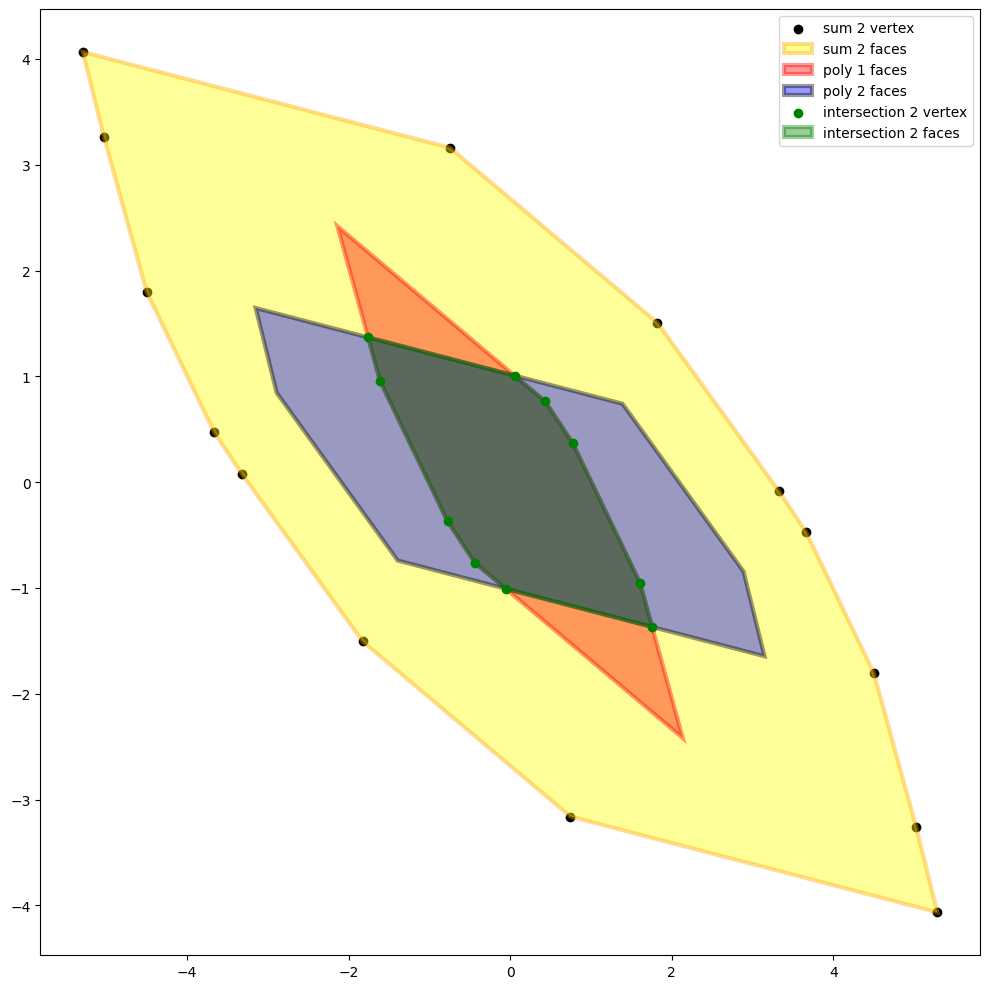

In [15]:
# uncomment for interactive plots
# %matplotlib widget
fig = plt.figure(4,figsize=[10,10])

# intersection polytope
plot_polytope(plot=fig,
               polytope=f_sum_poly, 
               face_color='yellow', 
               edge_color='orange',
               vertex_color='black',
               label='sum 2',
               alpha=1)

# polytope1
plot_polytope(plot=fig,
               polytope=f1_poly, 
               face_color='red', 
               edge_color='red',
               label='poly 1',
               show_vertices=False,
               alpha=0.2)

# polytope2
plot_polytope(plot=fig,
               polytope=f2_poly, 
               face_color='blue', 
               edge_color='black',
               label='poly 2',
               show_vertices=False,
               alpha=0.2)

# intersection polytope
plot_polytope(plot=fig,
               polytope=f_int_poly, 
               face_color='green', 
               edge_color='green',
               vertex_color='green',
               label='intersection 2',
               alpha=1)


fig.tight_layout()
plt.legend()
plt.show()

# Human model polytope evaluation

A simple example program 3d force polytope 
evaluation of a randomised 30 muscle 7dof 
human musculoskeletal model 

In [16]:
import pycapacity.human as capacity
import numpy as np

L = 30 # muscles
n = 6 # joint number - dof
m = 3 # 3d forces

J = np.array(np.random.rand(m,n))*2-1 # random jacobian matrix
N = np.array(np.random.rand(n,L))*2-1 # random moment arm matrix

F_max = 100*np.ones(L)  # muscle forces limits max and min
F_min = np.zeros(L)

dl_max = 10*np.ones(L)  # muscle contraction velocity limits max and min
dl_min = -10*np.ones(L)


dq_max = np.ones(n)  # joint velocity limits
dq_min = -np.ones(n)



Calculate the force polytope vertices <br>
$ \mathcal{P}_f = \{f ~|~  J^Tf= NF, \quad F  \in [F_{min},~ F_{max}]\}$

In [17]:
# force polytope
f_poly = capacity.force_polytope(J,N, F_min, F_max, tol=10) # cal culate the polytope vertices and faces


Calculate the velocity polytope vertices <br>
$ \mathcal{P}_v = \{\dot{x} ~|~  \dot{x} = J\dot{q},~ -N^T\dot{q}=\dot{l} \quad \dot{l}  \in [\dot{l}_{min},~ \dot{l}_{max}], ~\dot{q}  \in [\dot{q}_{min},~ \dot{q}_{max}]\}$

In [18]:
# velocity polytope
vel_poly = capacity.velocity_polytope(J,N, 
                                      dl_min=dl_min, 
                                      dl_max = dl_max, 
                                      dq_min=dq_min, 
                                      dq_max=dq_max,
                                      tol=0.5) # cal culate the polytope vertices and faces

Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis


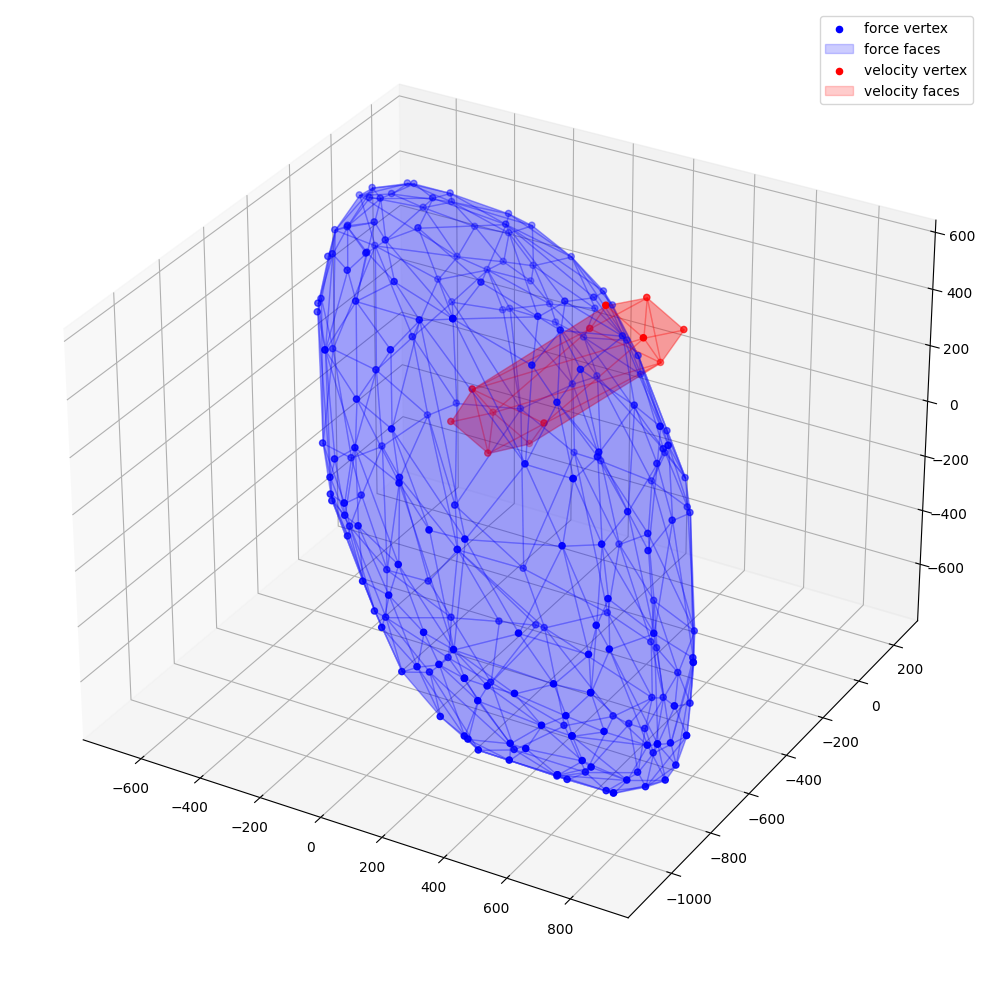

In [19]:
# uncomment for interactive plots
# %matplotlib widget

fig = plt.figure(5, figsize=[10,10])

# plot polytope
plot_polytope(plot=fig,
               polytope=f_poly, 
               face_color='blue', 
               edge_color='blue',
               vertex_color='blue',
               label='force',
               alpha=0.2)


# plot polytope
plot_polytope(plot=fig,
               polytope=vel_poly, 
               face_color='red', 
               edge_color='red',
               vertex_color='red',
               label='velocity',
               alpha=0.2,
               scale = 100)

plt.tight_layout()
plt.legend()

## Human musculoskeletal model force polytope and ellipsoid comparison

In [20]:
# force polytope
f_poly = capacity.force_polytope(J,N, -F_max, F_max, tol=10) # cal culate the polytope vertices and faces
f_ellip = capacity.force_ellipsoid(J,N,F_max)

Visual: no faces found, calculating faces
using provided 3d axis


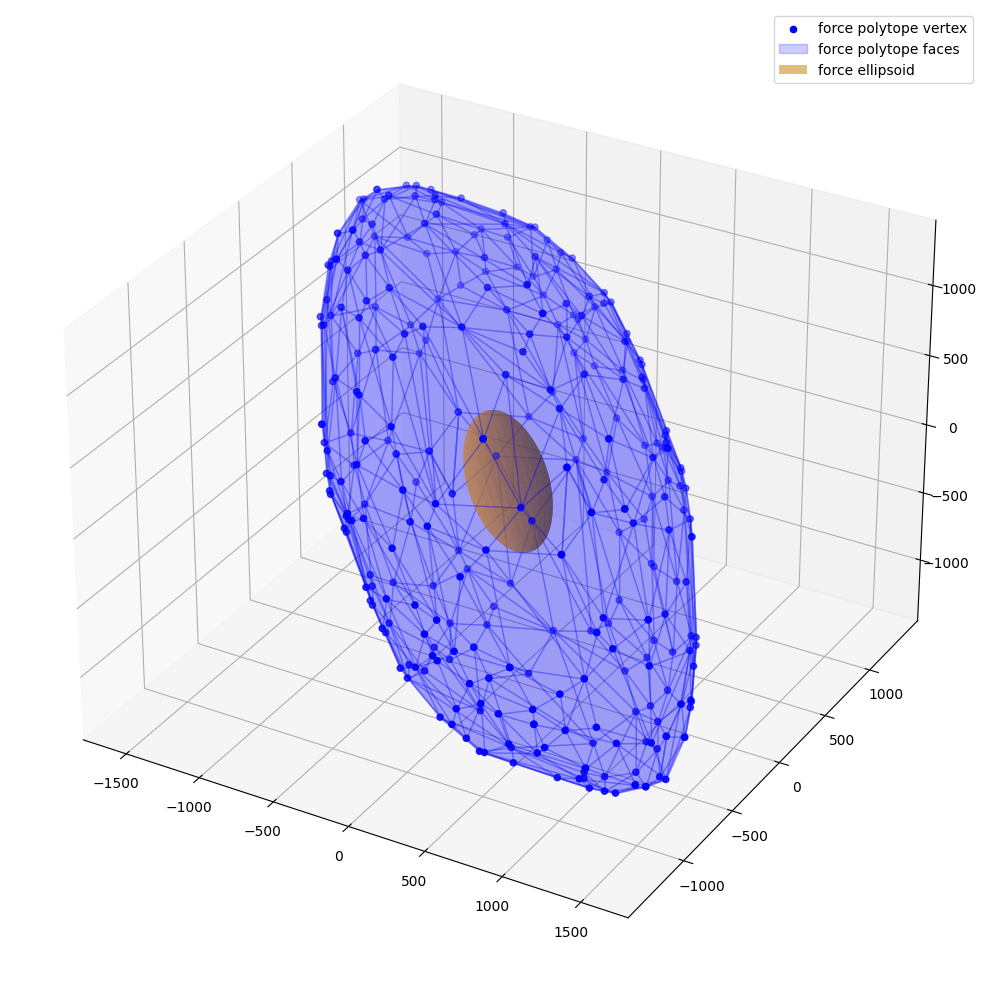

In [21]:
# uncomment for interactive plots
# %matplotlib widget

fig = plt.figure(6, figsize=[10,10])

# plot polytope
plot_polytope(plot=fig,
               polytope=f_poly, 
               face_color='blue', 
               edge_color='blue',
               vertex_color='blue',
               label='force polytope',
               alpha=0.2)

plot_ellipsoid(plot=fig,
               ellipsoid=f_ellip,
               color='orange',
               label='force ellipsoid',
               alpha=0.5)

plt.tight_layout()
plt.legend()

## Human musculoskeletal model velocity polytope and ellipsoid comparison

In [24]:
# velocity polytope and ellipsoid
v_poly = capacity.velocity_polytope(J, N=N, dl_min=dl_min, dl_max=dl_max, tol=0.1) # calculate the polytope vertices and faces
v_ellip = capacity.velocity_ellipsoid(J,N,dl_max)

Visual: no faces found, calculating faces
using provided 3d axis


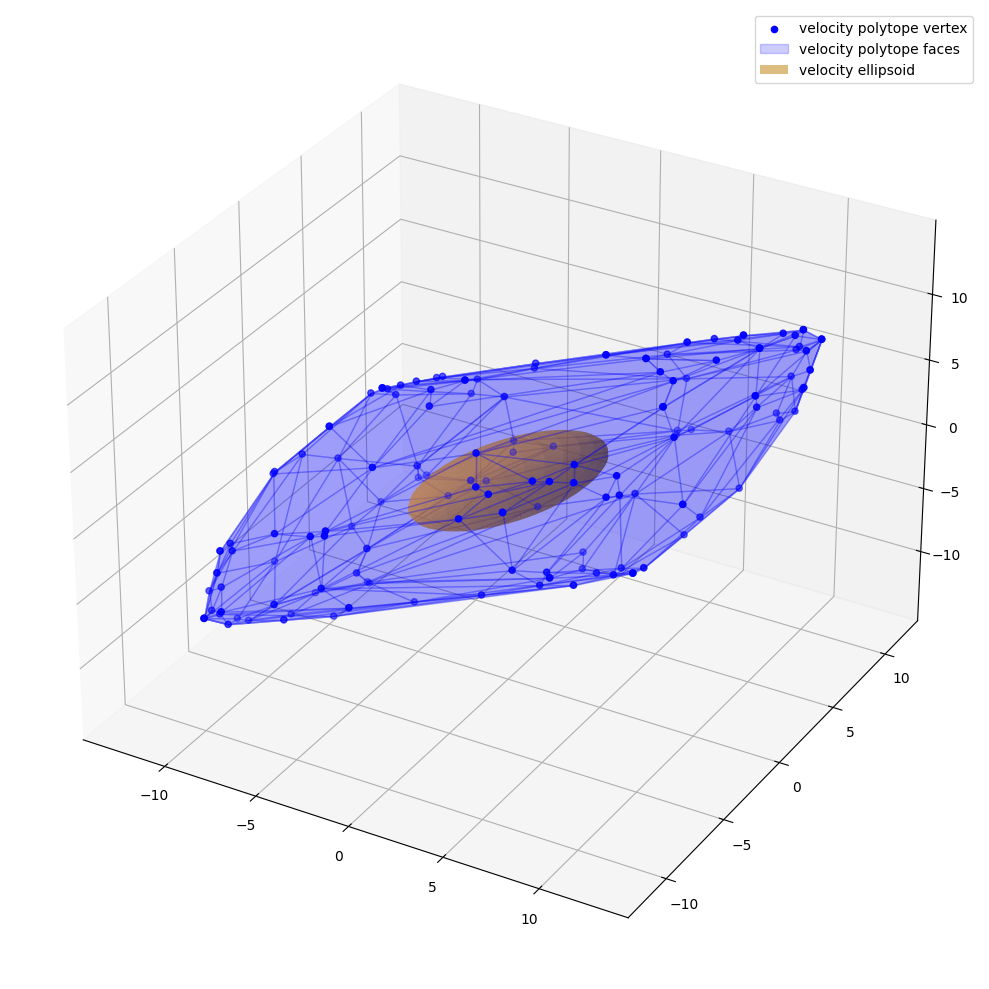

In [25]:
# uncomment for interactive plots
# %matplotlib widget

fig = plt.figure(17, figsize=[10,10])

# plot polytope
plot_polytope(plot=fig,
               polytope=v_poly, 
               face_color='blue', 
               edge_color='blue',
               vertex_color='blue',
               label='velocity polytope',
               alpha=0.2)

plot_ellipsoid(plot=fig,
               ellipsoid=v_ellip,
               color='orange',
               label='velocity ellipsoid',
               alpha=0.5)

plt.tight_layout()
plt.legend()